<a href="https://colab.research.google.com/github/vinayprabhu/translate_bias/blob/main/Noteboooks/wals_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from scipy.linalg import block_diag
# Don't do linear algebra in Python without these two lines
np.set_printoptions(suppress=True)
from collections import Counter
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%precision 3
#############################################
import sys
import importlib
importlib.reload(sys)
#######################
from google.colab import drive
drive.flush_and_unmount()
import os
drive.mount('/gdrive', force_remount=True)
# Enter your own proj_dir here
proj_dir='*************'
os.chdir(proj_dir)

Mounted at /gdrive


# Step-1: Read SSR

In [2]:
df_ssr=pd.read_csv('./data/df_ssr.csv')

In [3]:
df_ssr

,language,ssr
0,Turkish,0.000000
1,Hungarian,0.023256
2,Sundanese,0.023256
3,Sesotho,0.034884
4,Turkmen,0.034884
...,...,...
104,Norwegian,1.000000
105,Russian,1.000000
106,Scots_Gaelic,1.000000
107,Sindhi,1.000000


# Step-2: Download the data from World Atlas of Language Structures (WALS)
 # Source: https://wals.info/feature/30A.tab

In [4]:
df_wals=pd.read_csv('./lang_class/lang_wals.tsv',sep='\t')
df_wals

,wals code,name,value,description,latitude,longitude,genus,family,area
0,abk,Abkhaz,3,Three,43.083333,41.000000,Northwest Caucasian,Northwest Caucasian,Nominal Categories
1,aco,Acoma,1,None,34.916667,-107.583333,Keresan,Keresan,Nominal Categories
2,ain,Ainu,1,None,43.000000,143.000000,Ainu,Ainu,Nominal Categories
3,agw,Alagwa,2,Two,-5.500000,35.750000,Southern Cushitic,Afro-Asiatic,Nominal Categories
4,ala,Alamblak,2,Two,-4.666667,143.333333,Sepik Hill,Sepik,Nominal Categories
...,...,...,...,...,...,...,...,...,...
252,yur,Yurok,1,None,41.333333,-124.000000,Yurok,Algic,Nominal Categories
253,zan,Zande,4,Four,4.000000,26.000000,Ubangi,Niger-Congo,Nominal Categories
254,zqc,Zoque (Copainalá),1,None,17.000000,-93.250000,Mixe-Zoque,Mixe-Zoque,Nominal Categories
255,zul,Zulu,5,Five or more,-30.000000,30.000000,Bantoid,Niger-Congo,Nominal Categories


In [5]:
df_wals.description.value_counts()

None            145
Two              50
Three            26
Five or more     24
Four             12
Name: description, dtype: int64

In [6]:
# !pip install fuzzywuzzy

from fuzzywuzzy import fuzz
from fuzzywuzzy import process
df_wals['language']=df_wals.name.str.lower()
df_wals_=df_wals.loc[:,['language','wals code', 'description', 'latitude', 'longitude',
       'genus', 'family', 'area', ]]

df_ssr_=df_ssr.copy()
df_ssr_['language']=df_ssr.language.str.lower()

df1 = df_ssr_.copy()
df2 = df_wals_.copy()

df1['Name']=df1.language.values
df2['Name']=df2.language.values

df1['name_from_df2'] = df1['Name'].apply(lambda x: process.extractOne(x, df2['Name'].to_list(),score_cutoff=80))
name_from_df2_list = df1['name_from_df2'].to_list()
name_from_df2_list = [_[0] if _ != None else None for _ in name_from_df2_list]
df1['name_from_df2'] = name_from_df2_list

df1 = df1.merge(df2, left_on = 'name_from_df2', right_on = 'Name', suffixes=('','_2'))
df1.drop(['Name_2','name_from_df2'],axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [7]:
df_ssr_wals=df1.loc[:,['language', 'ssr','wals code', 'description', 'latitude', 'longitude', 'genus', 'family']]
df_ssr_wals

,language,ssr,wals code,description,latitude,longitude,genus,family
0,turkish,0.000000,tur,None,39.000000,35.000000,Turkic,Altaic
1,hungarian,0.023256,hun,None,47.000000,20.000000,Ugric,Uralic
2,igbo,0.046512,igb,None,6.000000,7.333333,Igboid,Niger-Congo
3,hawaiian,0.046512,haw,None,19.583333,-155.500000,Oceanic,Austronesian
4,hmong,0.046512,hmo,None,28.000000,105.000000,Hmong-Mien,Hmong-Mien
5,persian,0.058140,prs,None,32.000000,54.000000,Iranian,Indo-European
6,uzbek,0.058140,uzb,None,39.000000,66.000000,Turkic,Altaic
7,malagasy,0.069767,mal,None,-20.000000,47.000000,Barito,Austronesian
8,shona,0.081395,shn,Five or more,-18.000000,31.000000,Bantoid,Niger-Congo
9,nyanja_chichewa,0.093023,cic,Five or more,-14.000000,34.000000,Bantoid,Niger-Congo


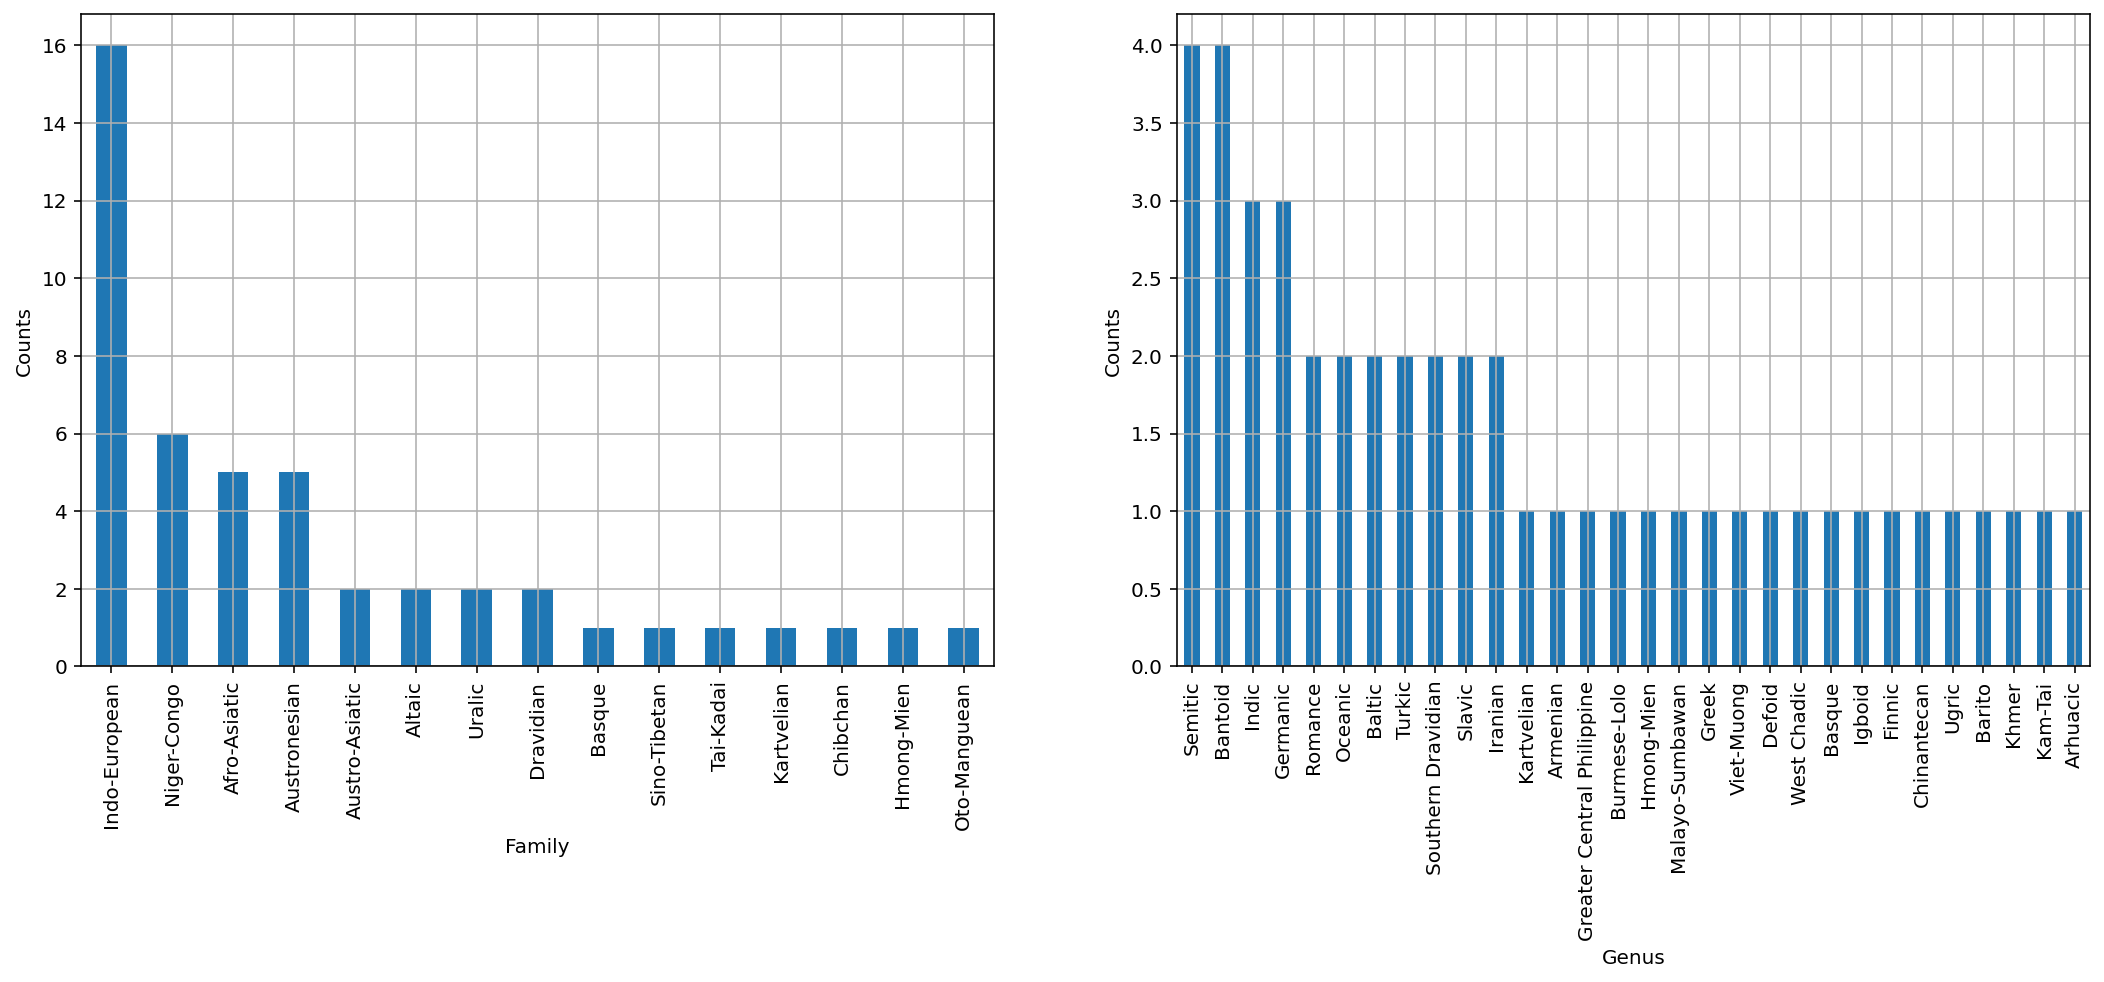

In [8]:
plt.figure(figsize=(18,6))
plt.subplot(121)
df_ssr_wals.family.value_counts().plot(kind='bar')
plt.grid('On')
plt.ylabel('Counts')
plt.xlabel('Family')
plt.subplot(122)
df_ssr_wals.genus.value_counts().plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('Genus')
plt.grid('On')
plt.savefig('./plots/wal_family_genus.pdf',bbox_inches='tight', pad_inches=0)

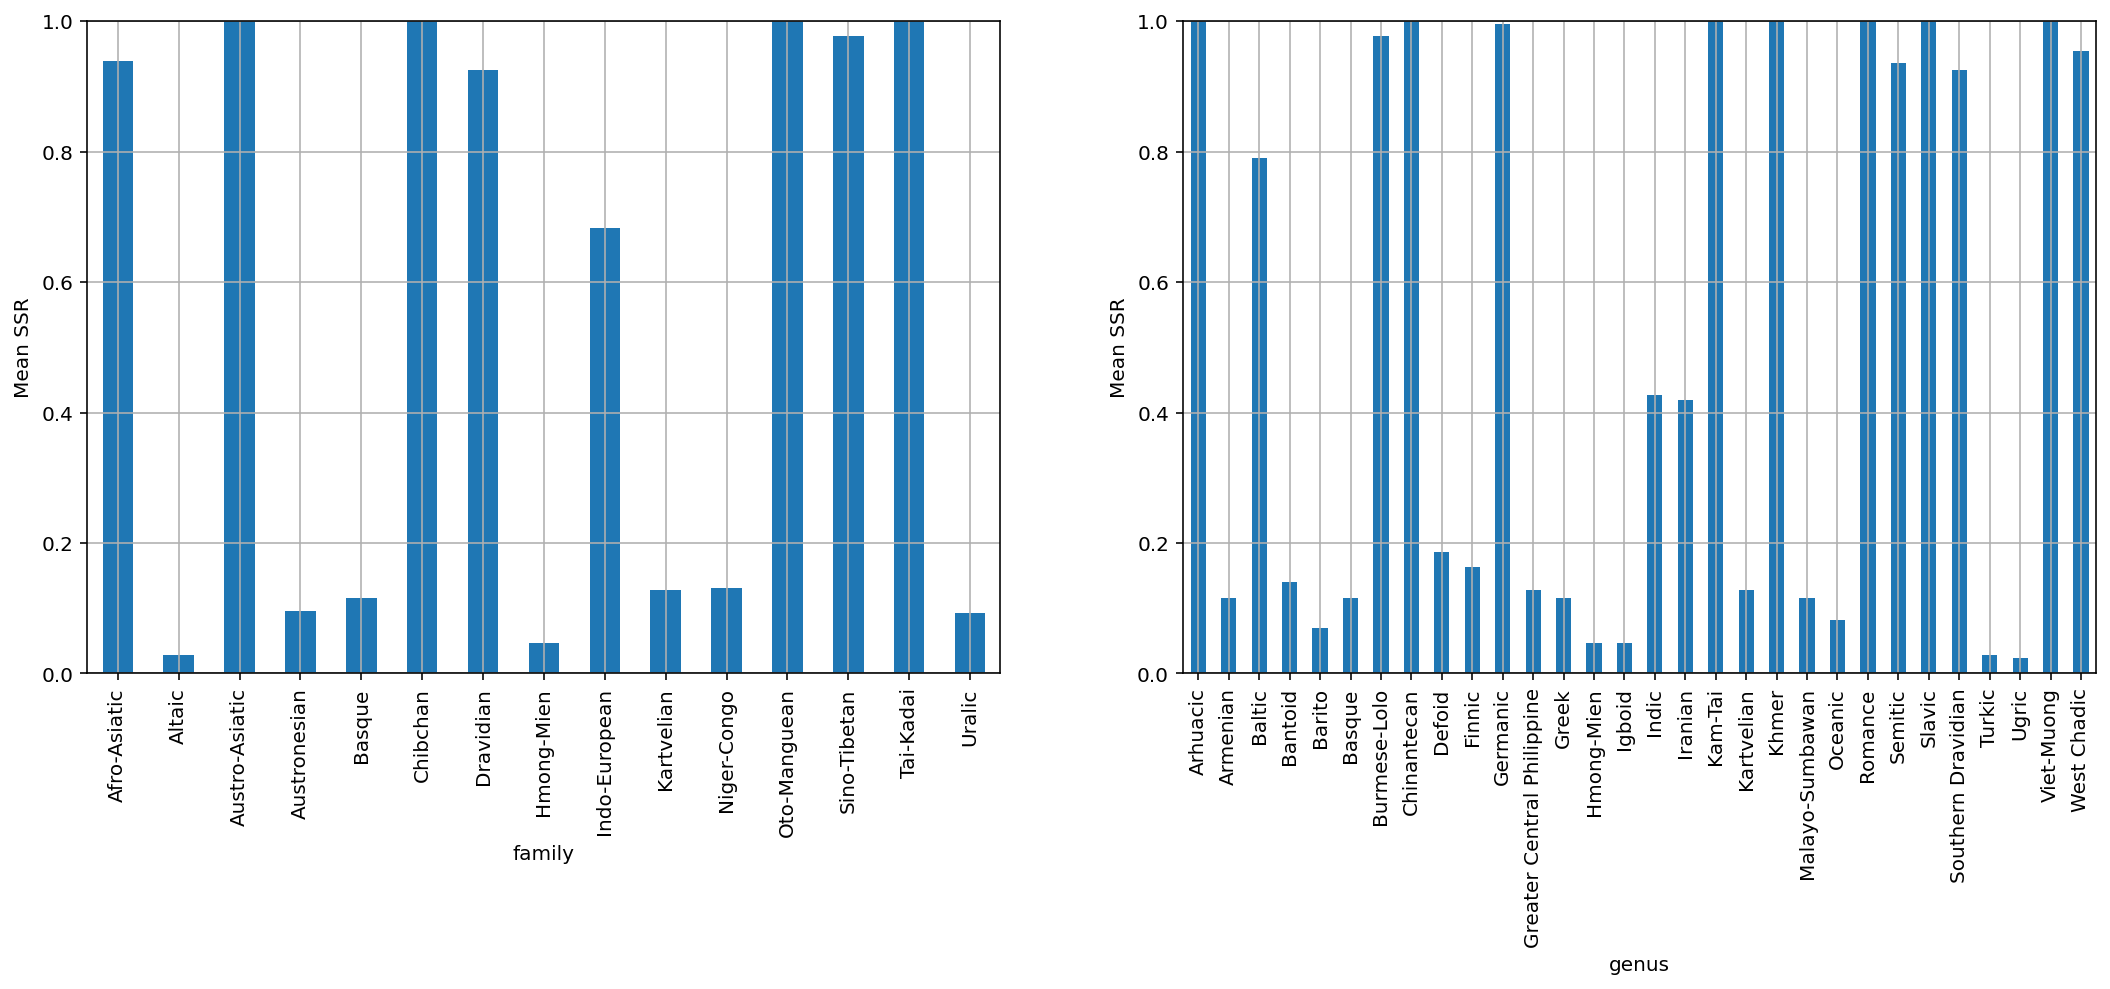

In [9]:
plt.figure(figsize=(18,6))
plt.subplot(121)
df_ssr_wals.groupby('family').ssr.mean().plot(kind='bar')
plt.ylabel('Mean SSR')
plt.ylim([0,1])
plt.grid('On')
plt.subplot(122)
df_ssr_wals.groupby('genus').ssr.mean().plot(kind='bar')
plt.grid('On')
plt.ylabel('Mean SSR')
plt.ylim([0,1])
plt.savefig('./plots/wal_ssr_ssr_mean.pdf',bbox_inches='tight', pad_inches=0)

In [10]:
df_family_ssr=df_ssr_wals.groupby(['family'], as_index=False).agg(
                      {'ssr':['mean','std'],'genus':'count'})
df_family_ssr

family       ssr           genus
                        mean       std count
0     Afro-Asiatic  0.939535  0.034297     5
1           Altaic  0.029070  0.041111     2
2   Austro-Asiatic  1.000000  0.000000     2
3     Austronesian  0.095349  0.035269     5
4           Basque  0.116279       NaN     1
5         Chibchan  1.000000       NaN     1
6        Dravidian  0.924419  0.106888     2
7       Hmong-Mien  0.046512       NaN     1
8    Indo-European  0.682413  0.411541    16
9       Kartvelian  0.127907       NaN     1
10     Niger-Congo  0.131783  0.077014     6
11    Oto-Manguean  1.000000       NaN     1
12    Sino-Tibetan  0.976744       NaN     1
13       Tai-Kadai  1.000000       NaN     1
14          Uralic  0.093023  0.098666     2

In [11]:
df_family_ssr.to_latex()

'\\begin{tabular}{llrrr}\n\\toprule\n{} &          family & \\multicolumn{2}{l}{ssr} & genus \\\\\n{} &      mean &       std & count \\\\\n\\midrule\n0  &    Afro-Asiatic &  0.939535 &  0.034297 &     5 \\\\\n1  &          Altaic &  0.029070 &  0.041111 &     2 \\\\\n2  &  Austro-Asiatic &  1.000000 &  0.000000 &     2 \\\\\n3  &    Austronesian &  0.095349 &  0.035269 &     5 \\\\\n4  &          Basque &  0.116279 &       NaN &     1 \\\\\n5  &        Chibchan &  1.000000 &       NaN &     1 \\\\\n6  &       Dravidian &  0.924419 &  0.106888 &     2 \\\\\n7  &      Hmong-Mien &  0.046512 &       NaN &     1 \\\\\n8  &   Indo-European &  0.682413 &  0.411541 &    16 \\\\\n9  &      Kartvelian &  0.127907 &       NaN &     1 \\\\\n10 &     Niger-Congo &  0.131783 &  0.077014 &     6 \\\\\n11 &    Oto-Manguean &  1.000000 &       NaN &     1 \\\\\n12 &    Sino-Tibetan &  0.976744 &       NaN &     1 \\\\\n13 &       Tai-Kadai &  1.000000 &       NaN &     1 \\\\\n14 &          Uralic & 

In [12]:
df_ssr_wals['n_gender']=df_ssr_wals.description.replace({'None':0, 'Five or more':6, 'Three':3, 'Two':2})
df_ssr_wals.columns

Index(['language', 'ssr', 'wals code', 'description', 'latitude', 'longitude',
       'genus', 'family', 'n_gender'],
      dtype='object')

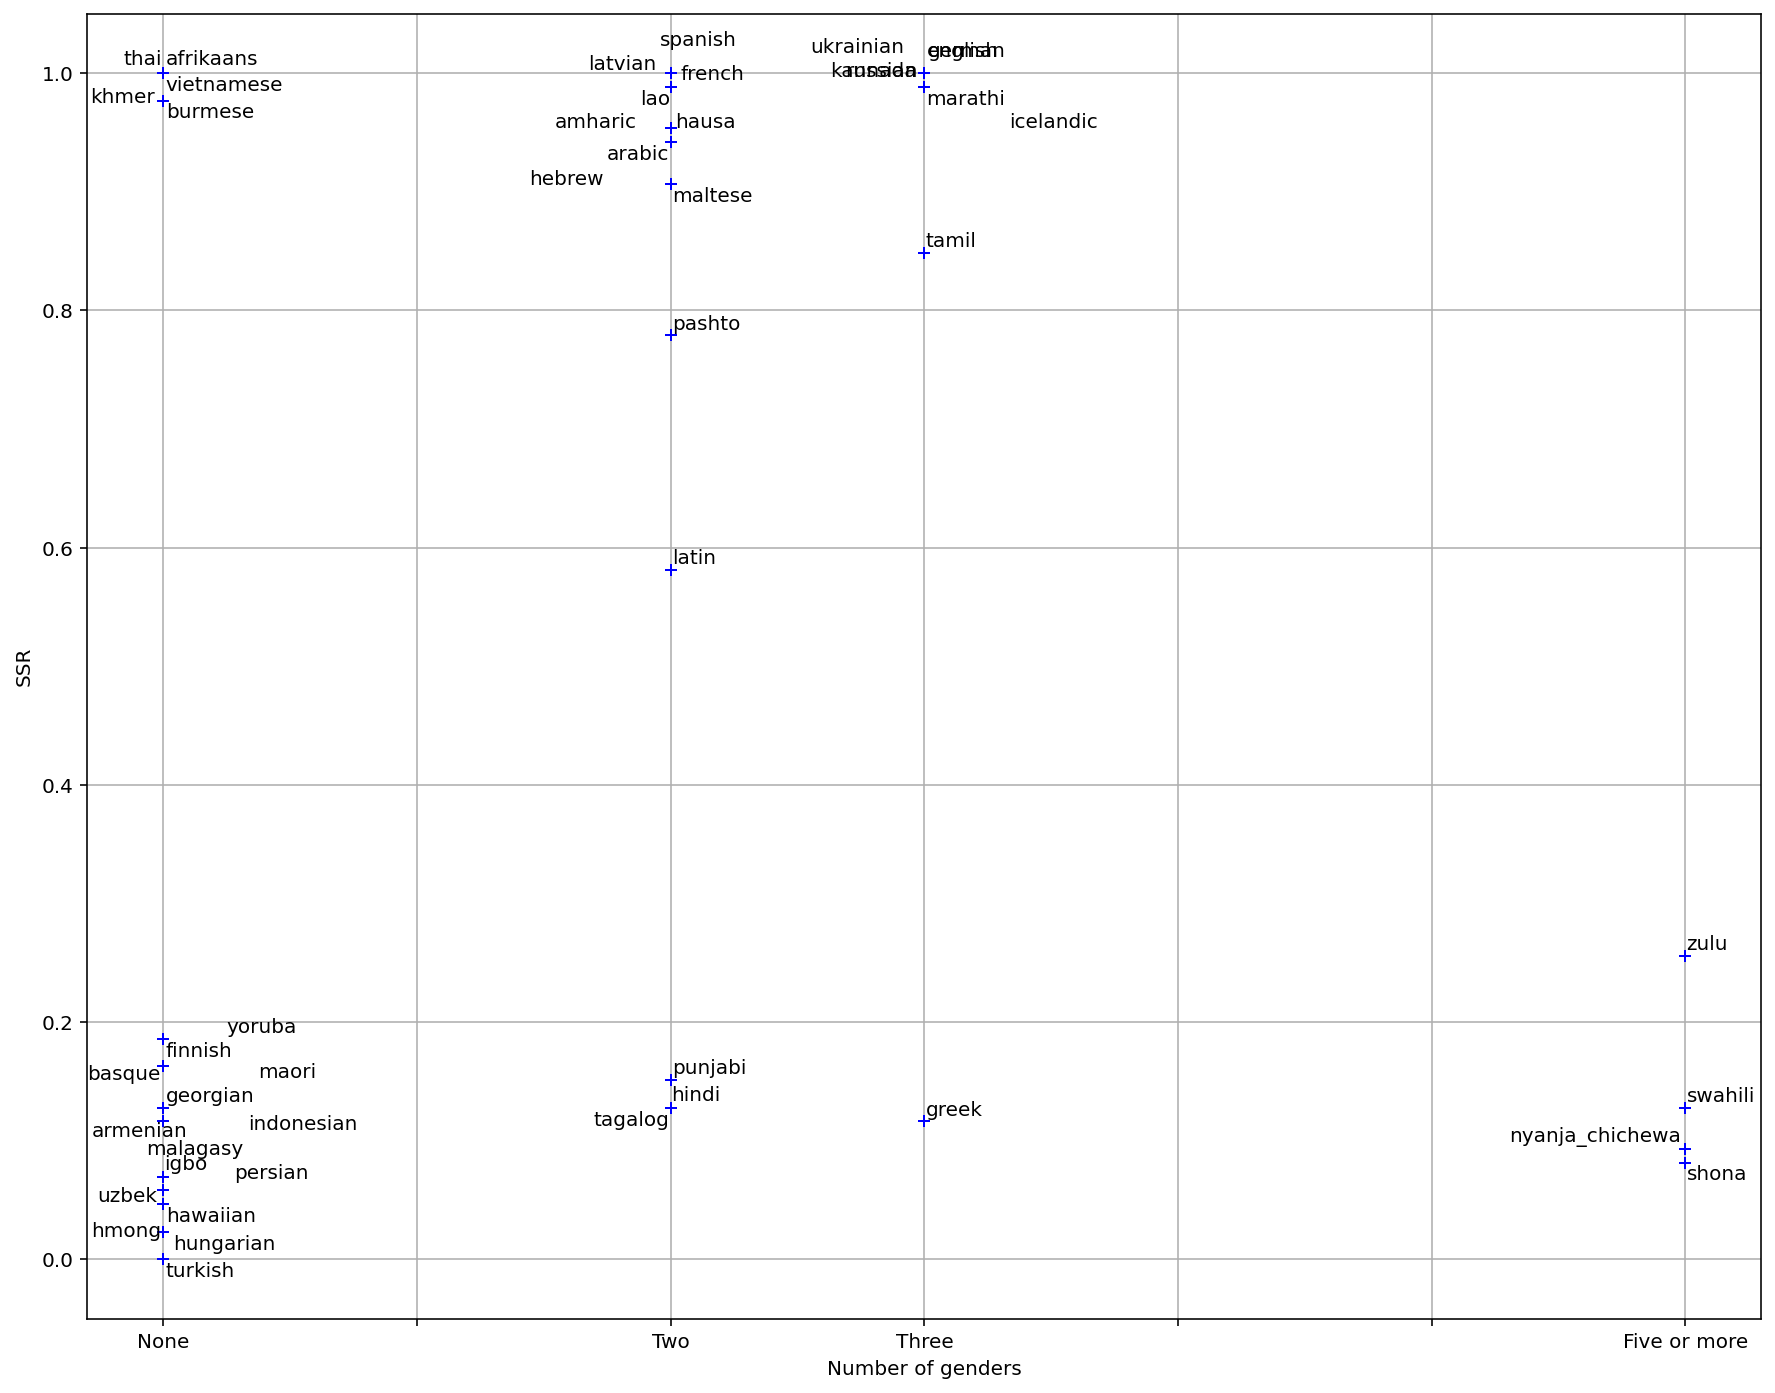

In [13]:
# !pip install adjustText
%matplotlib inline
from adjustText import adjust_text
x=df_ssr_wals.n_gender.values
y=df_ssr_wals.ssr.values
n=df_ssr_wals.language.values
fig, ax = plt.subplots(figsize=(15,12))
plt.plot(x, y, 'b+')
plt.grid('On')
texts = [plt.text(x[i], y[i], n[i]) for i in range(len(x))]
plt.xticks(np.arange(7), ['None', '','Two','Three','','', 'Five or more'])
adjust_text(texts)
plt.xlabel('Number of genders')
plt.ylabel('SSR')
plt.savefig('./plots/wal_ssr_ngender.pdf',bbox_inches='tight', pad_inches=0)